In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# The tech stocks we'll use for this analysis
stock_data = ['BBRI.JK']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Create a dictionary to store the data
data = {}

for stock in stock_data:
    data[stock] = yf.download(stock, start, end)

# Create a list of the dataframes
company_list = [data[stock] for stock in stock_data]
company_name = ["Bank BRI"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2024-03-27,6300.0,6325.0,6225.0,6250.0,6250.0,73308900,Bank BRI
2024-03-28,6100.0,6200.0,6025.0,6050.0,6050.0,288926900,Bank BRI
2024-04-01,6000.0,6025.0,5825.0,5925.0,5925.0,217207800,Bank BRI
2024-04-02,5850.0,5950.0,5625.0,5675.0,5675.0,412180900,Bank BRI
2024-04-03,5575.0,5675.0,5525.0,5625.0,5625.0,333518700,Bank BRI
2024-04-04,5650.0,5750.0,5650.0,5700.0,5700.0,131936100,Bank BRI
2024-04-05,5625.0,5700.0,5625.0,5650.0,5650.0,178817800,Bank BRI
2024-04-16,5375.0,5575.0,5350.0,5350.0,5350.0,600717500,Bank BRI
2024-04-17,5475.0,5500.0,5300.0,5300.0,5300.0,244002000,Bank BRI


In [106]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,233.000000,233.000000,233.000000,233.000000,233.000000,2.330000e+02
mean,5528.347639,5585.665236,5480.579399,5531.480687,5291.489564,1.328537e+08
std,324.509171,321.904836,322.838948,326.111258,364.811914,8.303110e+07
min,4920.000000,4960.000000,4830.000000,4830.000000,4584.382812,3.712660e+07
25%,5300.000000,5375.000000,5275.000000,5300.000000,5030.481934,8.959730e+07
50%,5500.000000,5575.000000,5450.000000,5525.000000,5244.040039,1.137600e+08
75%,5675.000000,5725.000000,5650.000000,5700.000000,5433.869629,1.505137e+08
max,6350.000000,6450.000000,6350.000000,6400.000000,6300.000000,8.984537e+08


In [107]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 233 entries, 2023-04-18 to 2024-04-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          233 non-null    float64
 1   High          233 non-null    float64
 2   Low           233 non-null    float64
 3   Close         233 non-null    float64
 4   Adj Close     233 non-null    float64
 5   Volume        233 non-null    int64  
 6   company_name  233 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 14.6+ KB


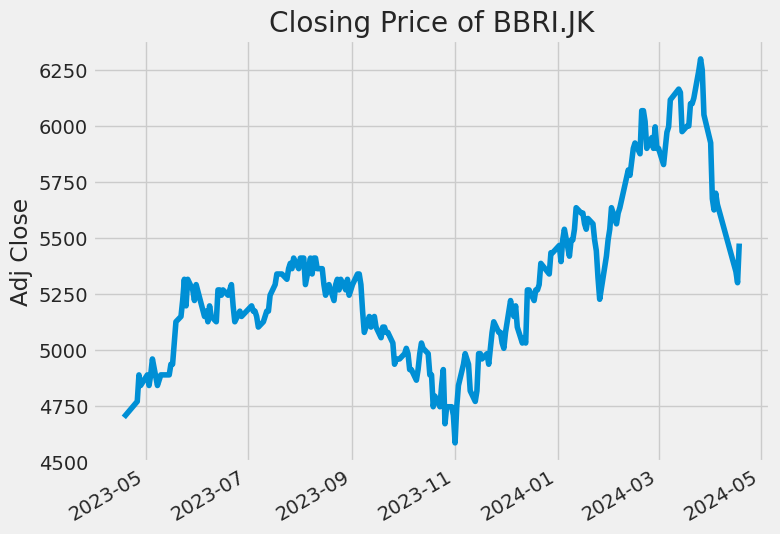

In [108]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {stock_data[i - 1]}")
    
plt.tight_layout()

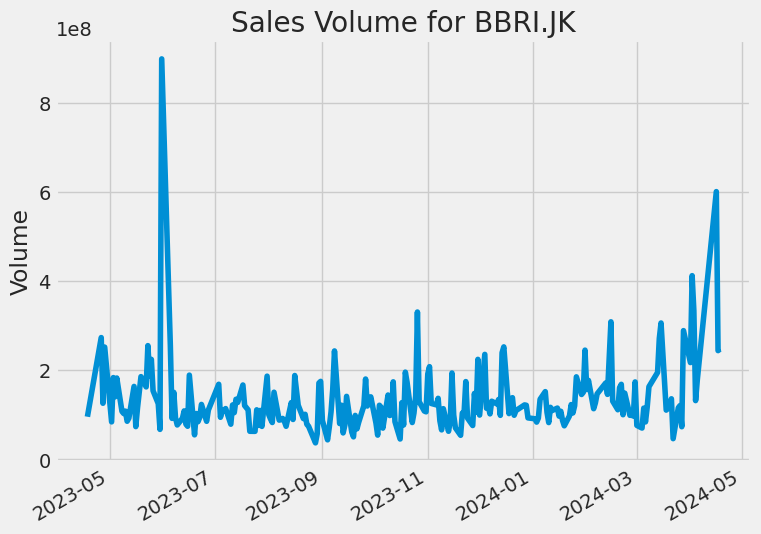

In [109]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {stock_data[i - 1]}")
    
plt.tight_layout()

In [110]:
#6
# Get the stock quote
df = pdr.get_data_yahoo('BBRI.JK', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,1236.342285,1245.432983,1227.251587,1236.342285,802.013733,17418800
2012-01-03,1254.523804,1263.614502,1236.342285,1254.523804,813.808044,90179557
2012-01-04,1263.614502,1263.614502,1245.432983,1263.614502,819.705200,166300872
2012-01-05,1263.614502,1272.705322,1245.432983,1263.614502,819.705200,147773802
2012-01-06,1254.523804,1272.705322,1245.432983,1254.523804,813.808044,115661497
...,...,...,...,...,...,...
2024-04-04,5650.000000,5750.000000,5650.000000,5700.000000,5700.000000,131936100
2024-04-05,5625.000000,5700.000000,5625.000000,5650.000000,5650.000000,178817800
2024-04-16,5375.000000,5575.000000,5350.000000,5350.000000,5350.000000,600717500


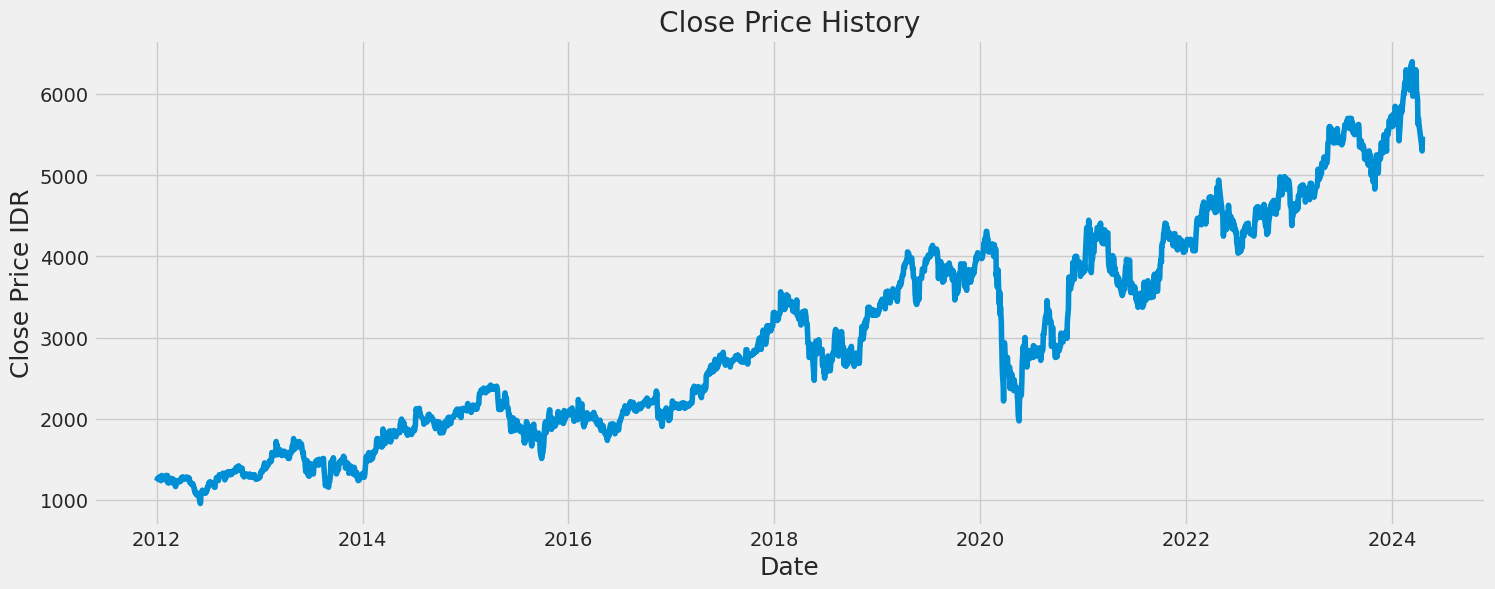

In [111]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.show()

In [112]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2887

In [113]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05175187],
       [0.0550907 ],
       [0.05676011],
       ...,
       [0.80717921],
       [0.79799727],
       [0.83013407]])

In [114]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.05175187, 0.0550907 , 0.05676011, 0.05676011, 0.0550907 ,
       0.05842953, 0.06009894, 0.05842953, 0.0550907 , 0.05342127,
       0.05175187, 0.05676011, 0.06009894, 0.06343777, 0.06009894,
       0.05842953, 0.05676011, 0.05842953, 0.05842953, 0.0550907 ,
       0.05342127, 0.06009894, 0.06176837, 0.06343777, 0.05842953,
       0.05342127, 0.06343777, 0.05676011, 0.04674363, 0.05342127,
       0.04841303, 0.04674363, 0.05008246, 0.05175187, 0.05175187,
       0.0550907 , 0.05676011, 0.05342127, 0.05175187, 0.04674363,
       0.04674363, 0.0550907 , 0.04841303, 0.04674363, 0.04674363,
       0.0450742 , 0.04006596, 0.03839654, 0.04006596, 0.04674363,
       0.05008246, 0.05175187, 0.05175187, 0.05175187, 0.05175187,
       0.04841303, 0.05008246, 0.05175187, 0.05008246, 0.05175187])]
[0.05509070042874581]

[array([0.05175187, 0.0550907 , 0.05676011, 0.05676011, 0.0550907 ,
       0.05842953, 0.06009894, 0.05842953, 0.0550907 , 0.05342127,
       0.05175187, 0.05676011, 0.06

In [115]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/home/mahaputra971/ProjectLSTM/prediksi-saham-lstm/venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2827/2827 ━━━━━━━━━━━━━━━━━━━━ 277s 96ms/step - loss: 0.0026


In [116]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step


125.30755062390551

/tmp/ipykernel_6518/3462487869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


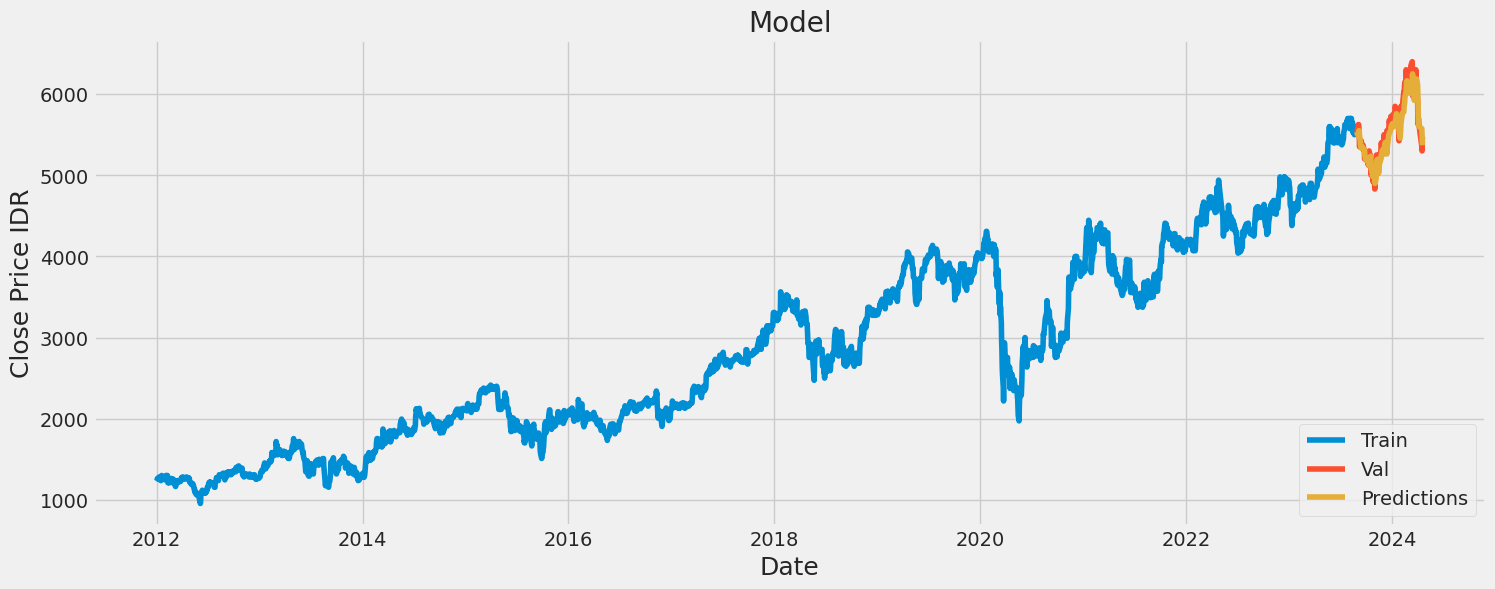

In [117]:
# Find the min and max values of 'Close' column in the first DataFrame
# y_min = df['Close'].min()
# y_max = df['Close'].max()

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')

# Set the limits of the Y-axis to match the first plot
# plt.ylim(y_min, y_max)

plt.show()

In [118]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-08-30,5525.0,5532.739746
2023-08-31,5550.0,5513.734863
2023-09-01,5575.0,5502.550781
2023-09-04,5625.0,5505.399902
2023-09-05,5625.0,5529.074707
...,...,...
2024-04-04,5700.0,5662.908691
2024-04-05,5650.0,5601.962891
2024-04-16,5350.0,5576.385742


In [119]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(valid['Close'], valid['Predictions'])
print(f'Mean Absolute Percentage Error (MAPE): {mape} %')

Mean Absolute Percentage Error (MAPE): 1.799245026213462 %
